<a href="https://colab.research.google.com/github/id-shiv/knowledge_base/blob/master/%5BProject_201%5D_Anomaly_Detection_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection
Anomaly or an outlier is data point in a dataset that is distant from other data points

In [ ]:
# Import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import seaborn as sb

In [ ]:
# data_set_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR4xPlauQieuG_9EOmOwT15kcXB6kDQpCjx4__hF4K5lPMFrVEbxEx-ruB_Q-aT9e6S1nd8-DNitVFx/pub?output=csv'
# data = pd.read_csv(data_set_path)
data = pd.DataFrame(columns=['Server', 'PowerConsumption', 'AmbientTemperature'])
insert_data = [
                ['ST0001', '124', '88'],
                ['ST0001', '124', '89'],
                ['ST0001', '126', '90'],
                ['ST0001', '124', '87'],
                ['ST0001', '127', '88'],
                ['ST0001', '129', '90'],
                ['ST0001', '142', '98'],
                ['ST0001', '145', '101'],
                ['ST0001', '148', '102'],
                ['ST0001', '145', '102'],
                ['ST0001', '130', '98'],
                ['ST0001', '127', '90'],
                ['ST0001', '124', '87'],
                ['ST0001', '124', '88'],
                ['ST0001', '124', '88'],
                ['ST0001', '124', '88'],
                ['ST0001', '124', '88']
]
for i in range(0, len(insert_data)):
  data.loc[i] = insert_data[i]

print(data)

    Server PowerConsumption AmbientTemperature
0   ST0001              124                 88
1   ST0001              124                 89
2   ST0001              126                 90
3   ST0001              124                 87
4   ST0001              127                 88
5   ST0001              129                 90
6   ST0001              142                 98
7   ST0001              145                101
8   ST0001              148                102
9   ST0001              145                102
10  ST0001              130                 98
11  ST0001              127                 90
12  ST0001              124                 87
13  ST0001              124                 88
14  ST0001              124                 88
15  ST0001              124                 88
16  ST0001              124                 88


In [ ]:
# Seperate out the label
persons = data['Server']
data_samples = data.loc[:, 'PowerConsumption': 'AmbientTemperature']

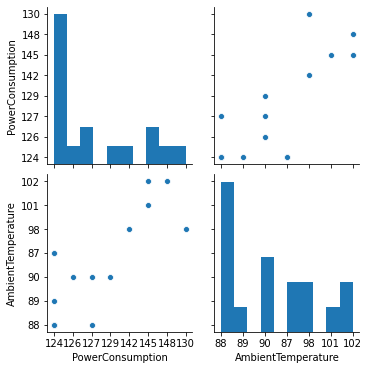

In [ ]:
# Pair plot
sb.pairplot(data_samples)

Detect Multivariate outliers using one-class Support Vector Machines

In [ ]:
model = OneClassSVM(kernel='linear', nu=0.80)
model.fit(data_samples)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='linear',
            max_iter=-1, nu=0.8, shrinking=True, tol=0.001, verbose=False)

# Detect surge or spike (caused due to outage etc)

In [ ]:
print(model.predict(data_samples))
print(data[model.predict(data_samples) == 1])

[-1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
   Server PowerConsumption AmbientTemperature
7  ST0001              145                101
8  ST0001              148                102
9  ST0001              145                102
